In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

import seaborn as sns
import matplotlib.pyplot as plt
import pickle


# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

## Random Forest Model

In [2]:
#Load data
df = pd.read_csv("data/df_final_filtered.csv")

#Remove cols stage, status and groupid
cols = [col for col in df.columns.to_list() if col not in ['stage','status','groupid']]
df = df[cols]

#Fill missings with 999
df = df.fillna(999)

#Set X and y
X = df.drop(columns='starter')
y = df['starter']

# Perform train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       796
           1       0.00      0.00      0.00        30

    accuracy                           0.96       826
   macro avg       0.48      0.50      0.49       826
weighted avg       0.93      0.96      0.95       826

Confusion Matrix:


c:\Users\peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


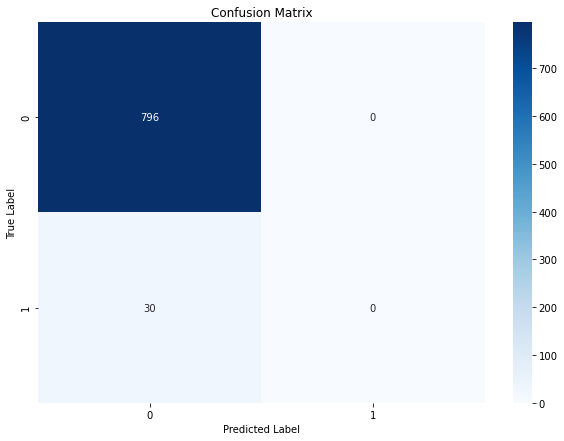

In [3]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
# Assuming your target variable has classes 'class_0', 'class_1', ..., you can replace these with your actual class names
class_names = df['starter'].unique()

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plot_confusion_matrix(cm, class_names)

## Perform SMOTE to resample data and and create random forest with balanced classes

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       796
           1       0.00      0.00      0.00        30

    accuracy                           0.96       826
   macro avg       0.48      0.50      0.49       826
weighted avg       0.93      0.96      0.95       826



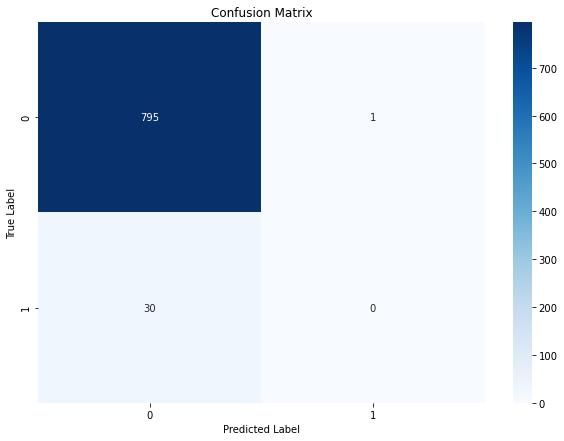

Precision: 0.93
Recall: 0.96
F1 Score: 0.95


In [4]:
# Load your dataframe
df = pd.read_csv("data/df_final_filtered.csv")
cols = [col for col in df.columns.to_list() if col not in ['stage','status','groupid']]
df = df[cols]
df = df.fillna(999)

# Prepare the data
# Replace 'target' with the name of your target column
X = df.drop(columns='starter')
y = df['starter']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the model with class weights
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_resampled, y_resampled)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Assuming your target variable has classes 'class_0', 'class_1', ..., you can replace these with your actual class names
class_names = df['starter'].unique()

plot_confusion_matrix(cm, class_names)

# Calculate and print performance metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


## Resample using sklearn resample

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       799
           1       0.00      0.00      0.00        27

    accuracy                           0.96       826
   macro avg       0.48      0.50      0.49       826
weighted avg       0.94      0.96      0.95       826



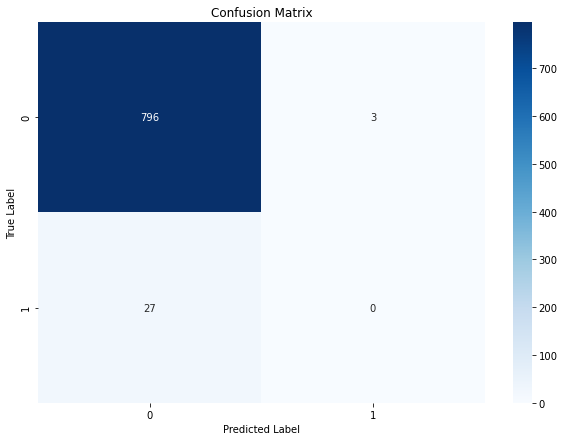

Precision: 0.94
Recall: 0.96
F1 Score: 0.95


In [5]:
# Load your dataframe
df = pd.read_csv("data/df_final_filtered.csv")
cols = [col for col in df.columns.to_list() if col not in ['stage','status','groupid']]
df = df[cols]
df = df.fillna(999)

# Prepare the data
# Replace 'target' with the name of your target column
X = df.drop(columns='starter')
y = df['starter']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Combine the training data back into a single dataset
train_data = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
minority = train_data[train_data['starter'] == 1]
majority = train_data[train_data['starter'] == 0]

# Upsample minority class
minority_upsampled = resample(minority, 
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

# Separate features and target
X_resampled = upsampled.drop('starter', axis=1)
y_resampled = upsampled['starter']

# Initialize and train the model with class weights
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_resampled, y_resampled)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Assuming your target variable has classes 'class_0', 'class_1', ..., you can replace these with your actual class names
class_names = df['starter'].unique()

plot_confusion_matrix(cm, class_names)

# Calculate and print performance metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       799
           1       0.14      0.89      0.24        27

    accuracy                           0.82       826
   macro avg       0.57      0.85      0.57       826
weighted avg       0.97      0.82      0.88       826



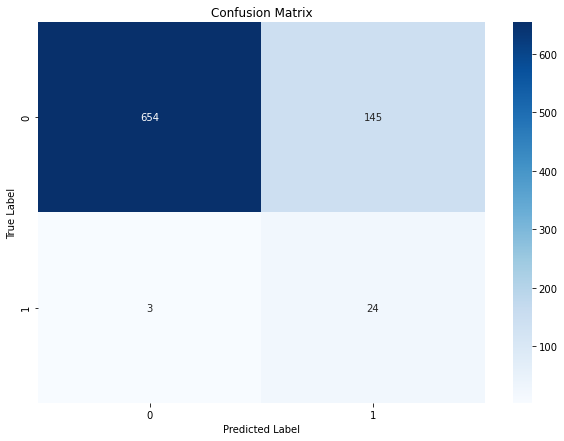

In [6]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Initialize and train the Balanced Random Forest model
brf = BalancedRandomForestClassifier(n_estimators=80, random_state=42)
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names)


In [7]:
# Assuming brf is your best performing BalancedRandomForestClassifier
with open(r'models/best_model_balanced_random_forest.pkl', 'wb') as file:
    pickle.dump(brf, file)


c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter

Classification Report with RFE:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       799
           1       0.15      1.00      0.26        27

    accuracy                           0.81       826
   macro avg       0.57      0.90      0.58       826
weighted avg       0.97      0.81      0.87       826



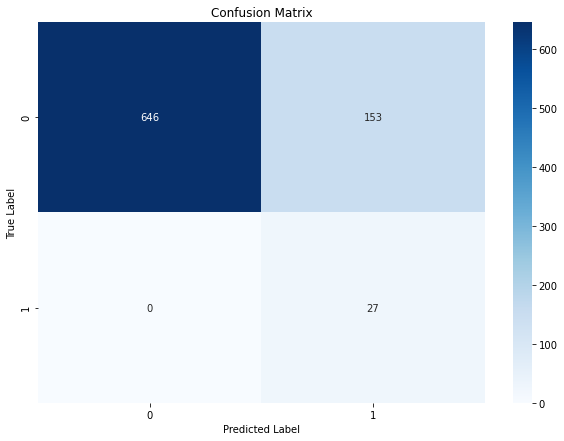

ROC-AUC with RFE: 0.91


In [8]:
# Initialize the model
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFE
rfe = RFE(estimator=brf, n_features_to_select=10)  # Adjust n_features_to_select as needed
rfe.fit(X_train, y_train)

# Transform the dataset with selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the Balanced Random Forest with selected features
brf.fit(X_train_rfe, y_train)

# Evaluate the model
y_pred_rfe = brf.predict(X_test_rfe)
y_proba_rfe = brf.predict_proba(X_test_rfe)[:, 1]

# Print the classification report and plot confusion matrix
print('Classification Report with RFE:')
print(classification_report(y_test, y_pred_rfe))

cm_rfe = confusion_matrix(y_test, y_pred_rfe)
plot_confusion_matrix(cm_rfe, class_names)

# Calculate and print additional metrics
roc_auc_rfe = roc_auc_score(y_test, y_proba_rfe)
print(f'ROC-AUC with RFE: {roc_auc_rfe:.2f}')


Classification Report with Threshold Moving:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       799
           1       0.46      0.22      0.30        27

    accuracy                           0.97       826
   macro avg       0.72      0.61      0.64       826
weighted avg       0.96      0.97      0.96       826



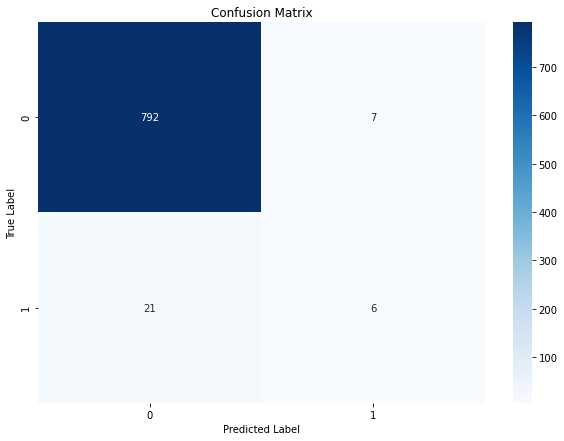

ROC-AUC with Threshold Moving: 0.91


In [9]:
# Predict probabilities
y_proba = brf.predict_proba(X_test_rfe)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Find the best threshold based on desired precision/recall trade-off
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Make predictions with the best threshold
y_pred_threshold = (y_proba >= best_threshold).astype(int)

# Evaluate the model
print('Classification Report with Threshold Moving:')
print(classification_report(y_test, y_pred_threshold))

cm_threshold = confusion_matrix(y_test, y_pred_threshold)
plot_confusion_matrix(cm_threshold, class_names)

roc_auc_threshold = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC with Threshold Moving: {roc_auc_threshold:.2f}')


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       799
           1       0.14      0.15      0.15        27

    accuracy                           0.94       826
   macro avg       0.56      0.56      0.56       826
weighted avg       0.94      0.94      0.94       826



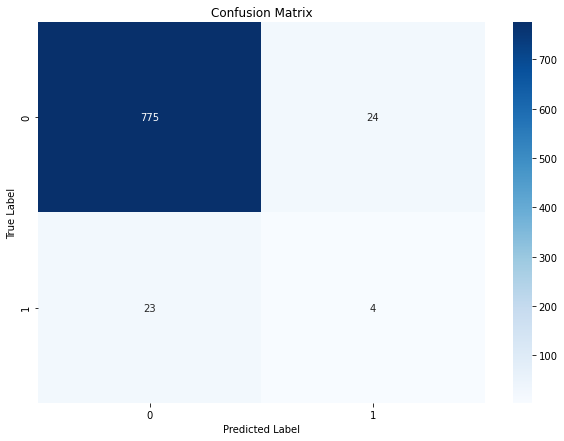

In [10]:
import xgboost as xgb

# Initialize and train the XGBoost model with class weights
model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       799
           1       0.00      0.00      0.00        27

    accuracy                           0.94       826
   macro avg       0.48      0.49      0.49       826
weighted avg       0.93      0.94      0.94       826



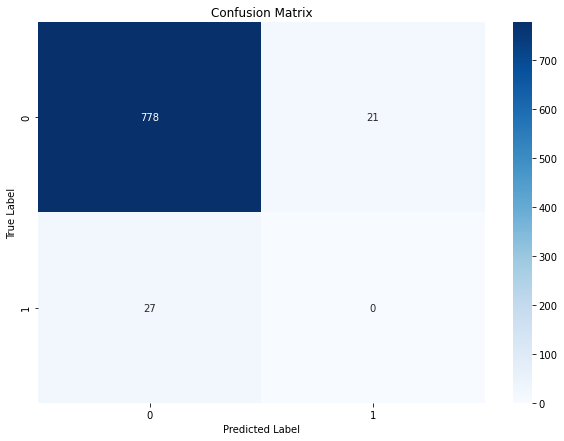

In [11]:
from sklearn.ensemble import IsolationForest

# Initialize and train the Isolation Forest model
iso_forest = IsolationForest(contamination=0.025, random_state=42)
iso_forest.fit(X_train)

# Anomaly detection (1 for normal, -1 for anomaly)
y_pred = iso_forest.predict(X_test)
y_pred = [1 if x == -1 else 0 for x in y_pred]  # Convert to binary classification

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names)


<ipython-input-12-942c69774b39>:13: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       799
           1       0.00      0.00      0.00        27

    accuracy                           0.96       826
   macro avg       0.48      0.49      0.49       826
weighted avg       0.94      0.96      0.95       826



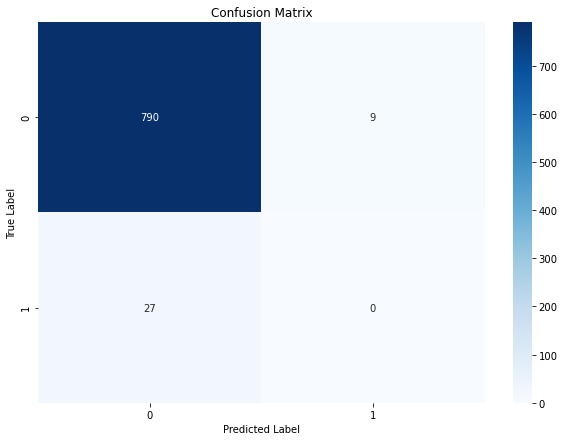

In [12]:
# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_resampled, y_resampled)

# Predict probabilities
y_proba = rf.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Find the best threshold based on desired precision/recall trade-off
# Example: maximizing the F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Make predictions with the best threshold
y_pred = (y_proba >= best_threshold).astype(int)

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names)


In [ ]:
from sklearn.feature_selection import RFE

# Initialize and train the model for feature selection
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=10)  # Adjust number of features to select
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train the final model with selected features
model.fit(X_train_rfe, y_train)

# Make predictions
y_pred = model.predict(X_test_rfe)

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names)


In [13]:
import lightgbm as lgb
import re

# Custom loss function for imbalance
def custom_asymmetric_loss(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    grad = np.where(y_true == 1, -2 * residual, -residual)
    hess = np.where(y_true == 1, 2.0, 1.0)
    return grad, hess

df.columns = [re.sub(r'[^A-Za-z0-9_]+', '', col) for col in df.columns]

# Replace 'target' with the name of your target column
X = df.drop(columns='starter')
y = df['starter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LightGBM model
train_data = lgb.Dataset(X_train, label=y_train)
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'metric': 'binary_logloss',
    'objective': custom_asymmetric_loss
}

model = lgb.train(params, train_data)

# Make predictions
y_pred = (model.predict(X_test) >= 0.5).astype(int)

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names)


[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 3303, number of used features: 200
[LightGBM] [Info] Using self-defined objective function


TypeError: unsupported operand type(s) for -: 'float' and 'Dataset'